In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['mathtext.fontset'] = 'dejavuserif' 
rcParams['figure.figsize'] = (10, 7)
rcParams['figure.dpi'] = 100
rcParams['axes.grid'] = True
rcParams['font.size'] = 14
# rcParams

In [2]:
with open("data.csv") as f:
    data = pd.read_csv(f)

In [3]:
def y_func(f, f_0):
    return f ** 2 / (f_0 ** 2 - f ** 2)

def y_func_error(f, f_0, s_f, s_f_0):
    return y_func(f, f_0) * 2 * np.sqrt((s_f / f) ** 2 + (np.sqrt((f_0 * s_f_0) ** 2 + (f * s_f) ** 2) / (f_0 ** 2 - f**2)) ** 2 )

In [89]:
U_0 = 0.06
data["T"] = 24 + (data["U"] - U_0) / 0.041 + 273
data["y"] = y_func(data["f"], data["f_0"])
data["y_error"] = y_func_error(data["f"], data["f_0"], 0.5, 0.5)
data.to_csv("edited_data.csv")

[ 7  8  9 10 11 12 13 15 16 17]
[    8.76107825 -2570.4403362 ] [ 0.29744522 88.14758534]
-2460.9402099904173


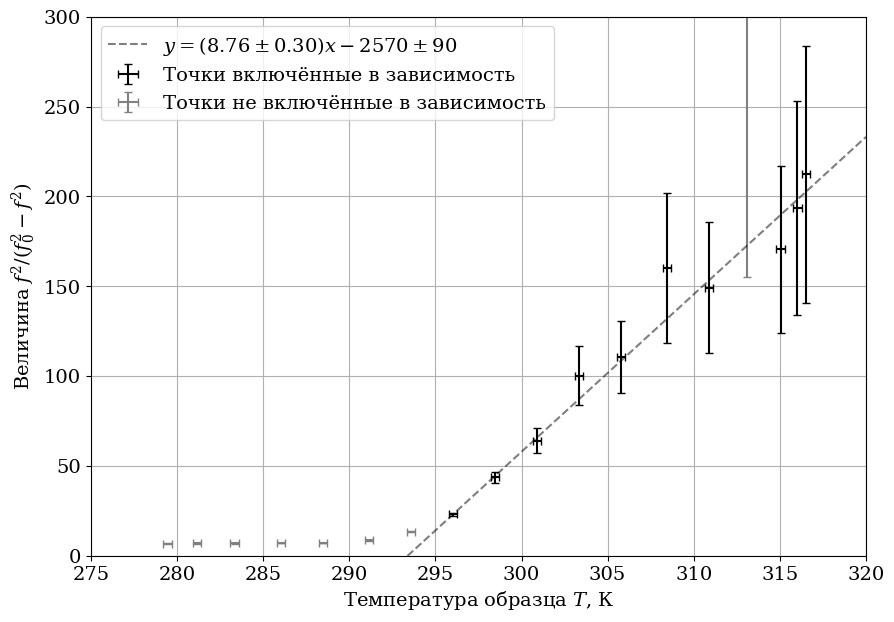

In [95]:
from numpy.polynomial import polynomial

not_in = np.array([0, 1, 2, 3, 4, 5, 6, 14])
incl = np.setdiff1d(np.arange(0, 18), not_in)
print(incl)
plt.errorbar(data["T"][incl], data["y"][incl], data["y_error"][incl], 0.01/0.041, 'none', capsize=3, color="black", label="Точки включённые в зависимость")
plt.errorbar(data["T"][not_in], data["y"][not_in], data["y_error"][not_in], 0.01/0.041, 'none', capsize=3, color="grey", label="Точки не включённые в зависимость")

coef, cov = np.polyfit(data["T"][incl], data["y"][incl], 1, cov=True, w=1/data["y_error"][incl])
err = np.sqrt(np.diag(cov))
print(coef, err)
print(poly[0])
T_range = np.linspace(280, 320, 10)
line_label = f"$y = ({coef[0]:.2f} \pm {err[0]:.2f}) x {np.round(coef[1], -1):+.0f} \pm {np.round(err[1], -1):.0f}$"
plt.plot(T_range, T_range * coef[0] + coef[1], ls="--", color="black", alpha=0.5, label=line_label)

plt.xlabel("Температура образца $T$, К")
plt.ylabel("Величина $f^2 / (f_0^2 - f^2)$")
plt.xlim(275, 320)
plt.ylim(0, 300)
plt.legend()
plt.savefig("plot.pdf")

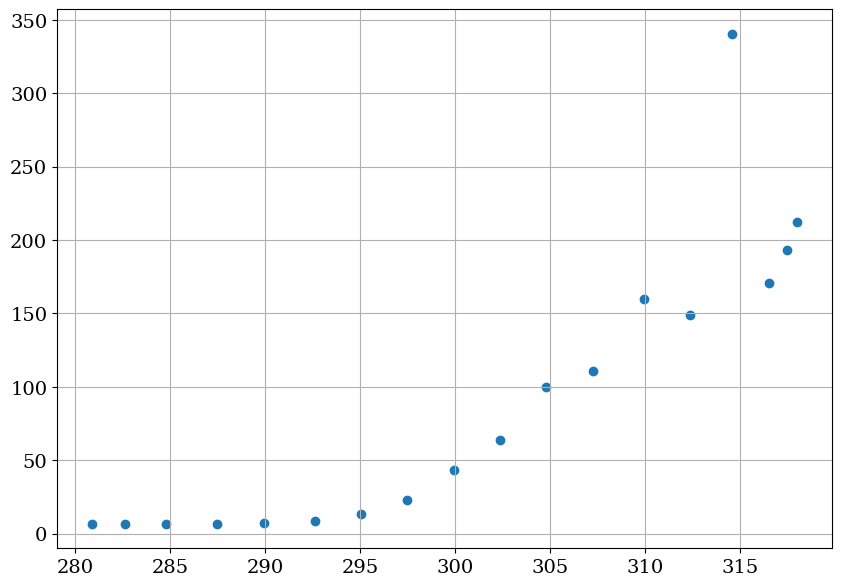

In [15]:
plt.scatter(data["T"], data["y"])